In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('Credit Card Customer Data.xlsx')


In [3]:
df = data.drop(['Sl_No','Customer Key'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [5]:
df.duplicated().sum()
df = df.drop_duplicates()

In [6]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,34878.274268,4.708783,2.397535,2.624037,3.590139
std,37813.736638,2.173763,1.625148,2.952888,2.877911
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,11000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,49000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
df.isnull().any()

Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [8]:
#No negatives and no nulls

In [9]:
df.skew()

Avg_Credit_Limit       2.186592
Total_Credit_Cards     0.150120
Total_visits_bank      0.149368
Total_visits_online    2.209521
Total_calls_made       0.656954
dtype: float64

/Users/leongarcia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Credit_Limit'>

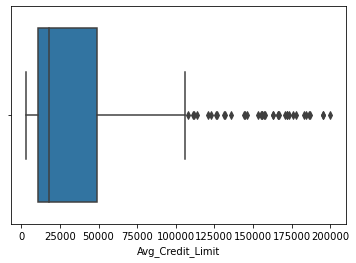

In [10]:
sns.boxplot(df.Avg_Credit_Limit)

/Users/leongarcia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Credit_Limit'>

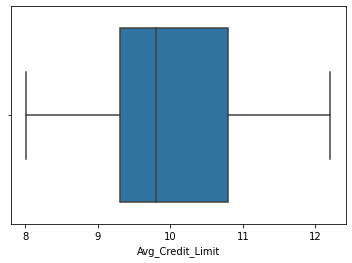

In [11]:
sns.boxplot(np.log(df['Avg_Credit_Limit']))

In [12]:
df.Avg_Credit_Limit = np.log(df.Avg_Credit_Limit)

/Users/leongarcia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_visits_online'>

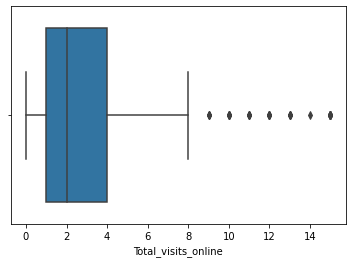

In [13]:
sns.boxplot(df.Total_visits_online)

In [14]:
df[df.Total_visits_online > 8].count()

Avg_Credit_Limit       37
Total_Credit_Cards     37
Total_visits_bank      37
Total_visits_online    37
Total_calls_made       37
dtype: int64

In [15]:
median = df.Total_visits_online.mean()
values = list(df[df.Total_visits_online>9]['Total_visits_online'])
df.Total_visits_online = df.Total_visits_online.replace(values,median)

In [16]:
df.skew() #took the log of Avg_Credit_Limit to convert to normal distribution and replaced outliers with mean for Total_visits_online for the same outcome

Avg_Credit_Limit       0.384896
Total_Credit_Cards     0.150120
Total_visits_bank      0.149368
Total_visits_online    0.995959
Total_calls_made       0.656954
dtype: float64

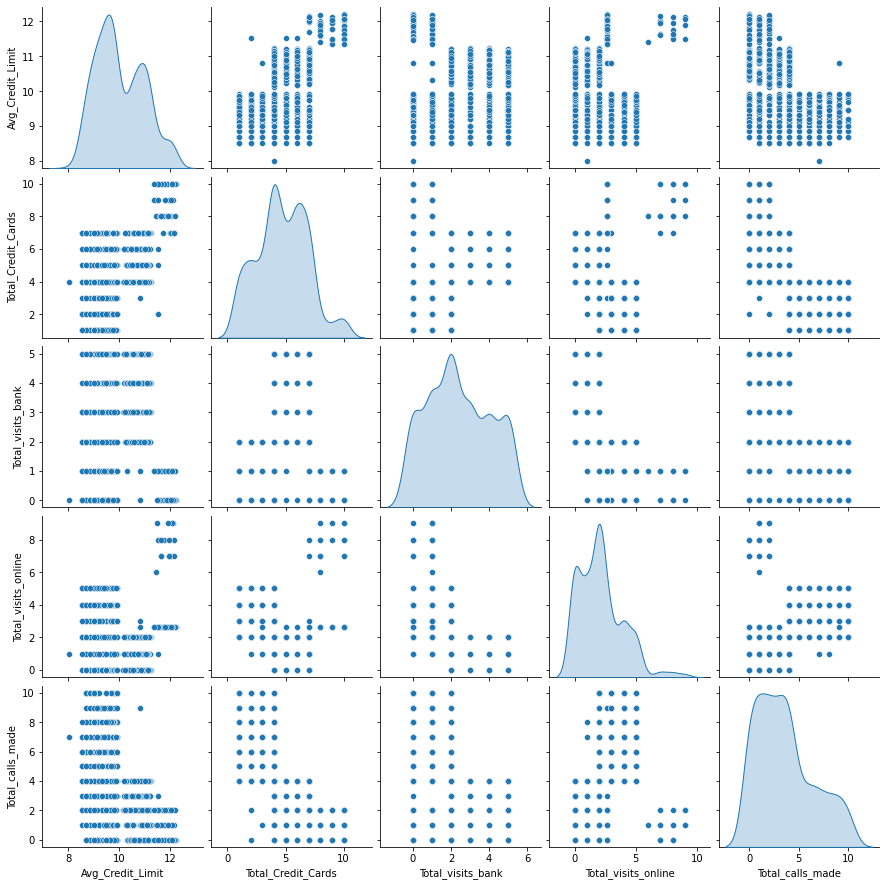

In [17]:
sns.pairplot(df, diag_kind='kde')

In [18]:
#it is difficult to see what is going on in these plots but along witht the correlation analysis there doesn't seem to be any extereme correlations between features.

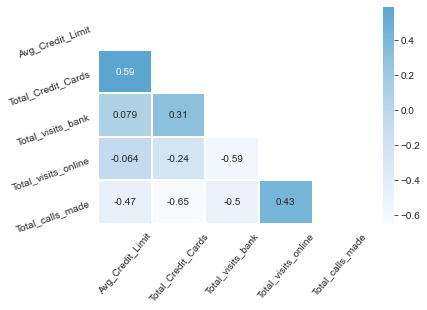

In [19]:
corr = df.corr()
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0  
sns.set_style(style = 'white')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns, linewidths= 1, mask = mask)   
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)  
plt.show()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

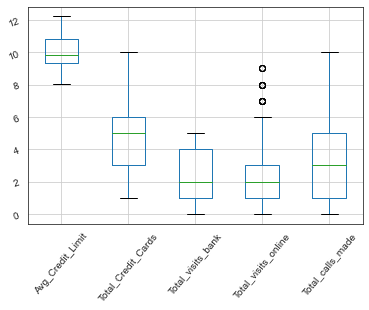

In [20]:
df.boxplot()
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)  

In [21]:
# I still see some outliers for total visits online but I have already converted this feature so I will leave them

In [22]:
from scipy.stats import zscore
#Time to normalize variables so they can be used in the model

In [23]:
df = df.apply(zscore)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.620334,-1.247087,-0.860606,-0.623792,-1.248443
1,0.874838,-0.786701,-1.476410,0.283582,1.881237
2,0.874838,1.054846,-0.860606,0.493638,0.142526
3,0.325434,0.134072,-0.860606,-0.623792,0.142526
4,1.620334,0.594459,-1.476410,0.283582,-0.205216


In [24]:
#Now I will make the KMeans model
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3245.000000
1,2,1771.327298
2,3,1221.457986
3,4,999.845167
4,5,915.518159
5,6,822.489029
6,7,746.414365
7,8,683.249187
8,9,639.155664
9,10,612.842146


In [25]:
from matplotlib import cm

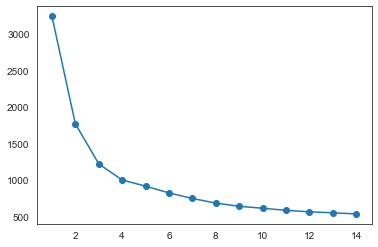

In [26]:
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [27]:
#It looks to me that the bend appears at 4 clusters

In [28]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(df)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [29]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 51 219 216 163]


In [30]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df.transpose()

,0,1,2,3
Avg_Credit_Limit,1.935320,-0.733090,0.827799,-0.717541
Total_Credit_Cards,1.840211,-1.062092,0.385580,0.340258
Total_visits_bank,-1.102098,-0.894349,0.633287,0.707236
Total_visits_online,1.293029,0.798824,-0.644485,-0.623792
Total_calls_made,-0.852971,1.161935,-0.540079,-0.578559


In [31]:
predictions = kmeans.predict(df)
df_kmeans = df
df_kmeans['group'] = predictions

In [32]:
df_kmeans["group"] = predictions
df_kmeans['group'] = df_kmeans['group'].astype('category')
df_kmeans.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
dtype: object

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

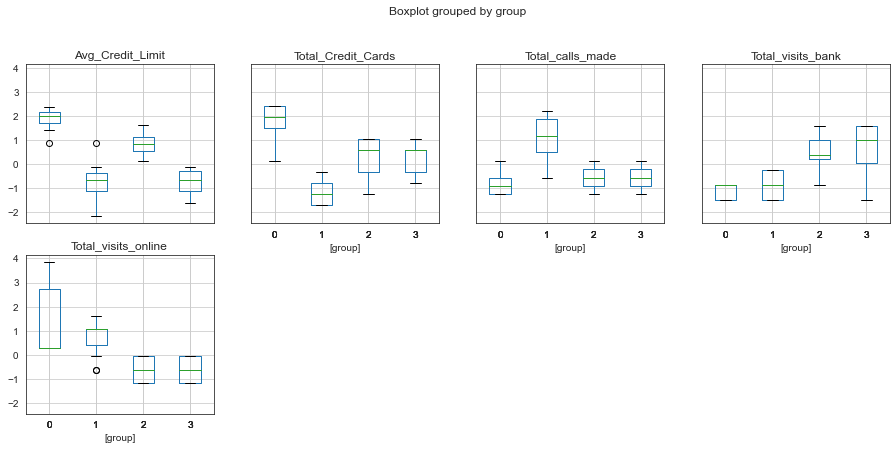

In [33]:

df_kmeans.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [41]:
#Now I will make the Hierarchichal clustering model
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

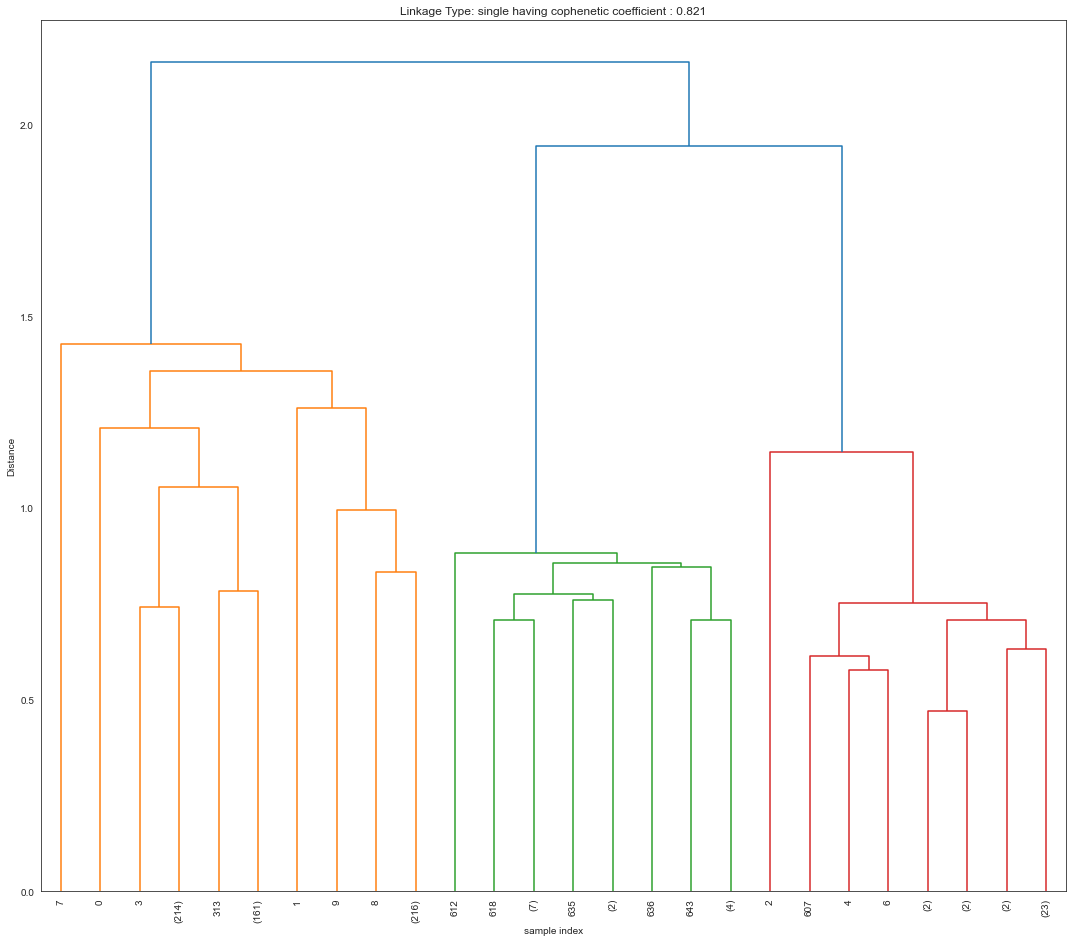

single 0.821003586892695


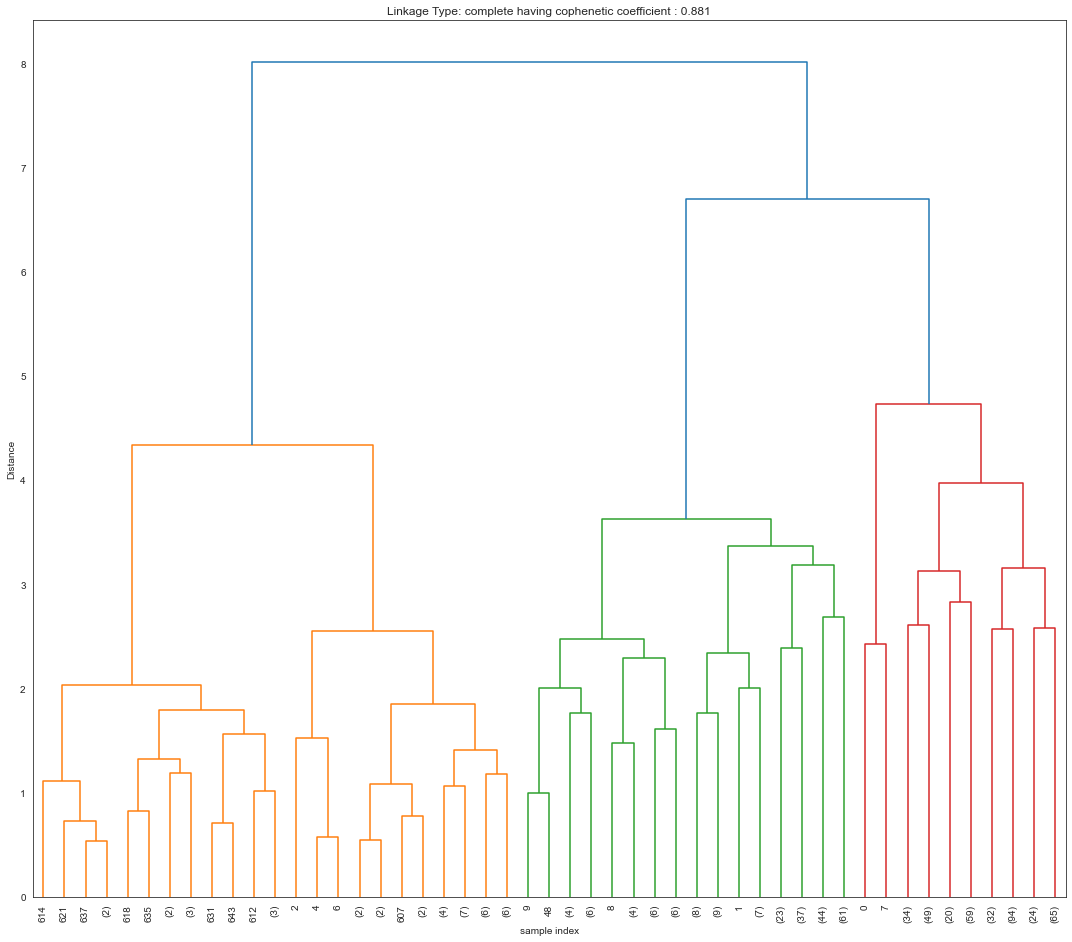

complete 0.8808217054041708


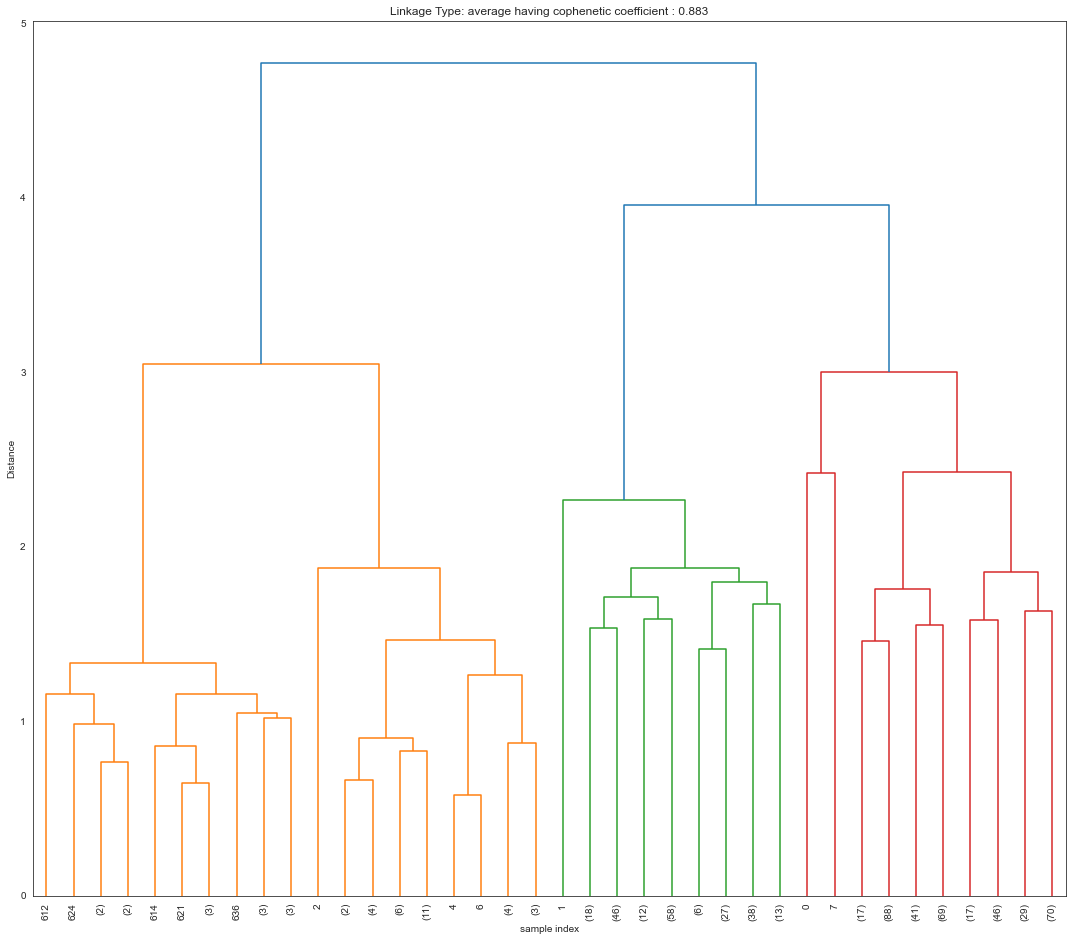

average 0.8834380704955623


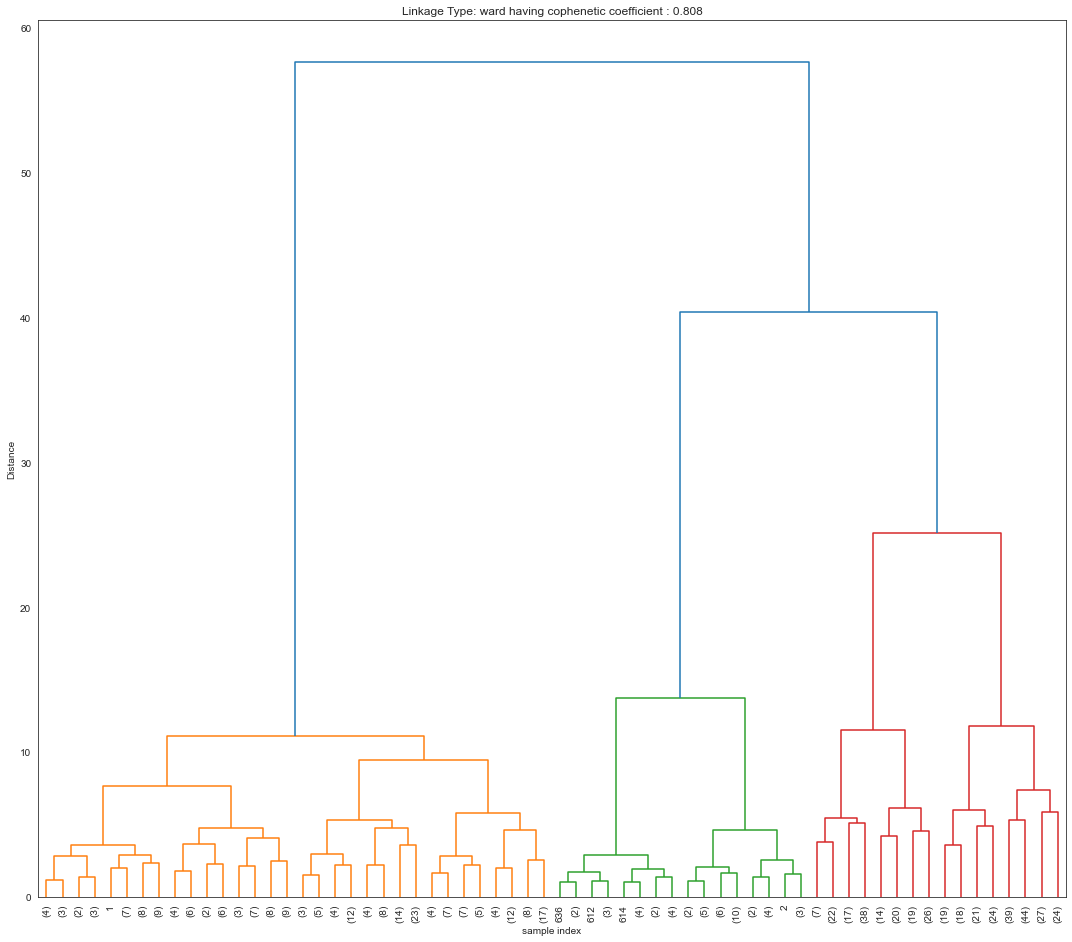

ward 0.8076943961565265


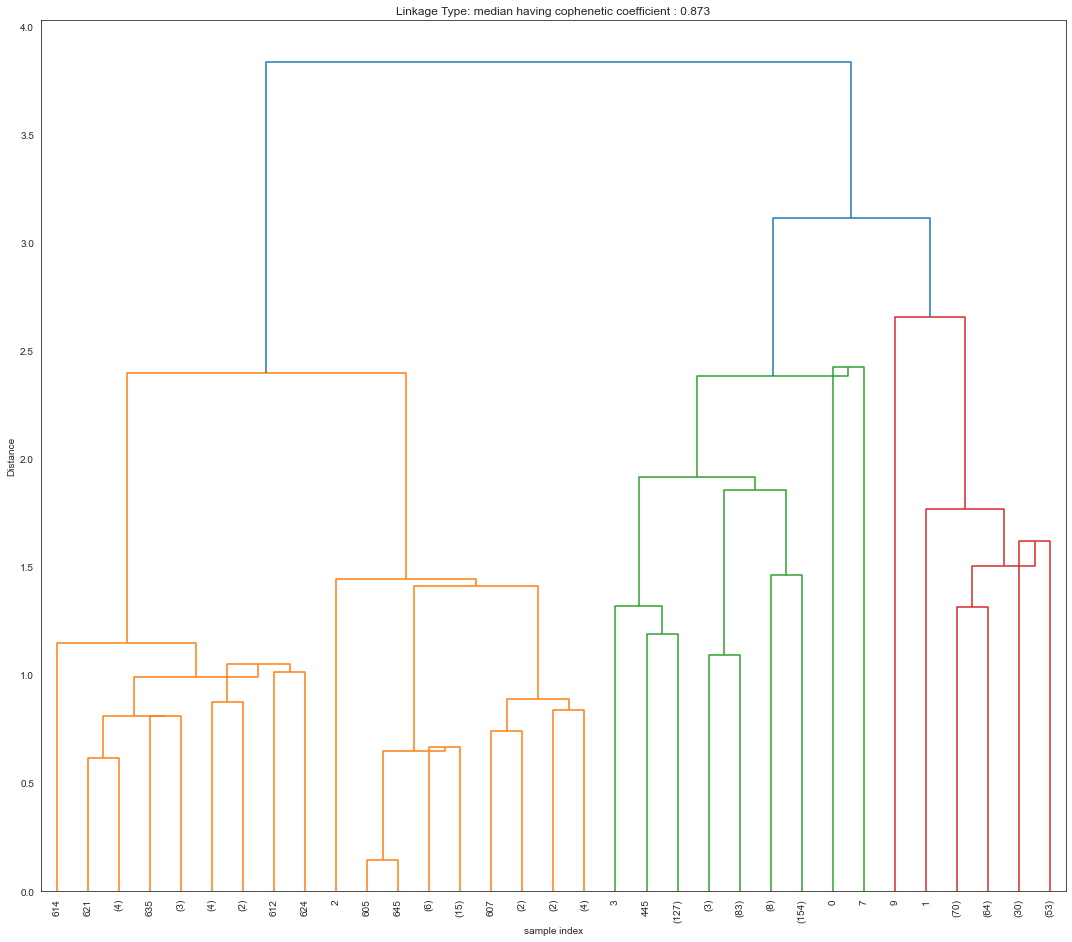

median 0.8730238177788404


In [45]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(df, i)
    cc,cophn_dist=cophenet(Z,pdist(df))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [48]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.821004
1,complete,0.880822
2,average,0.883438
3,ward,0.807694
4,median,0.873024


In [47]:
#Dendrogram from hierarchical clustering shows that 3-4 groups is also a good number and by comparison ward linkage has a high Coph. Coeff.
#and has a clearer differenciation of groups (by looking at the dendogram).

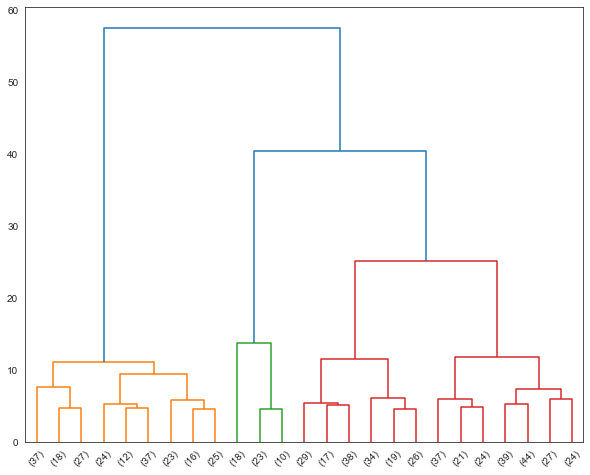

In [49]:
plt.figure(figsize=(10,8))
Z = linkage(df, 'ward', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 # show only the last p merged clusters
)
plt.show()

In [59]:
#maximum distance around 30 to form the different clusters as clearly visible it cuts the tallest vertical lines.

max_d= 30
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [60]:
set(clusters)  # So there are 3 clusters which are formed 

{1, 2, 3}

In [62]:
dataset2=df[:] #Create a duplicate of the dataset
dataset2['HierarchicalClusteringLabel']=clusters
dataset2.head(3)


<ipython-input-62-d6664f44b23c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['HierarchicalClusteringLabel']=clusters


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,HierarchicalClusteringLabel
0,1.620334,-1.247087,-0.860606,-0.623792,-1.248443,2,3
1,0.874838,-0.786701,-1.476410,0.283582,1.881237,1,1
2,0.874838,1.054846,-0.860606,0.493638,0.142526,0,2


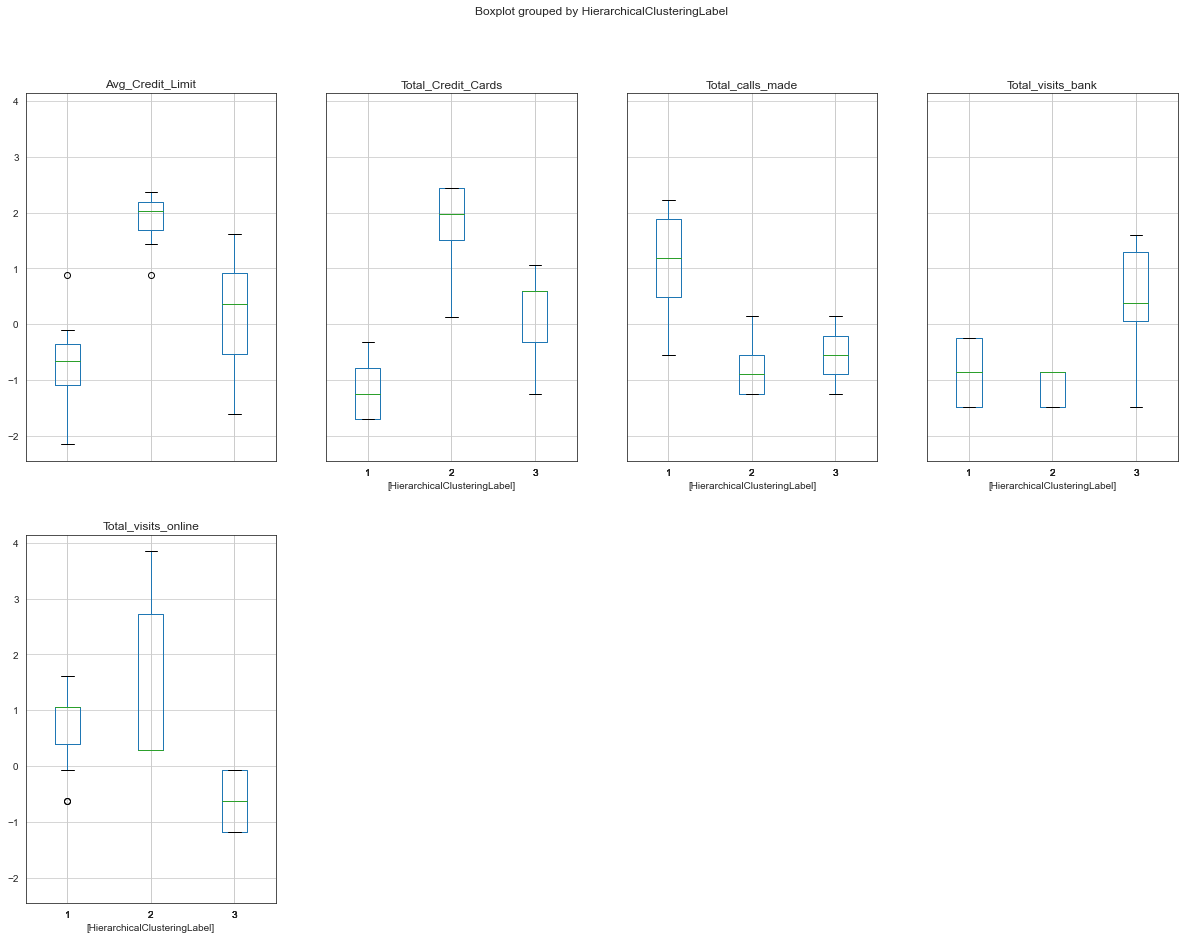

In [63]:
dataset2.boxplot(by = 'HierarchicalClusteringLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

In [65]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset2.drop('HierarchicalClusteringLabel',axis=1),dataset2['HierarchicalClusteringLabel'])

0.5135660482967954